      time  timeo  timeh  timel  total   ind    p     p1
44.0     1    1.0    0.0    4.0    6.0  44.0  0.0    0.0
45.0     5    5.0    2.0   10.0   22.0  45.0  1.0   16.0
46.0    12   12.0    8.0   26.0   58.0  46.0  1.0   36.0
47.0    54   48.0   31.0   51.0  184.0  47.0  1.0  126.0
48.0    45   43.0   42.0   51.0  181.0  48.0  1.0   -3.0
49.0    42   52.0   50.0   42.0  186.0  49.0  1.0    5.0
50.0    31   27.0   40.0   18.0  116.0  50.0  1.0  -70.0
51.0    13   17.0   19.0   12.0   61.0  51.0  1.0  -55.0
52.0    22   22.0   21.0   27.0   92.0  52.0  1.0   31.0
53.0    25   22.0   22.0   28.0   97.0  53.0  1.0    5.0
54.0    26   26.0   24.0   20.0   96.0  54.0  1.0   -1.0
55.0    21   22.0   30.0   10.0   83.0  55.0  1.0  -13.0
56.0     2    3.0    8.0    1.0   14.0  56.0  1.0  -69.0
57.0     1    0.0    3.0    0.0    4.0  57.0  1.0  -10.0


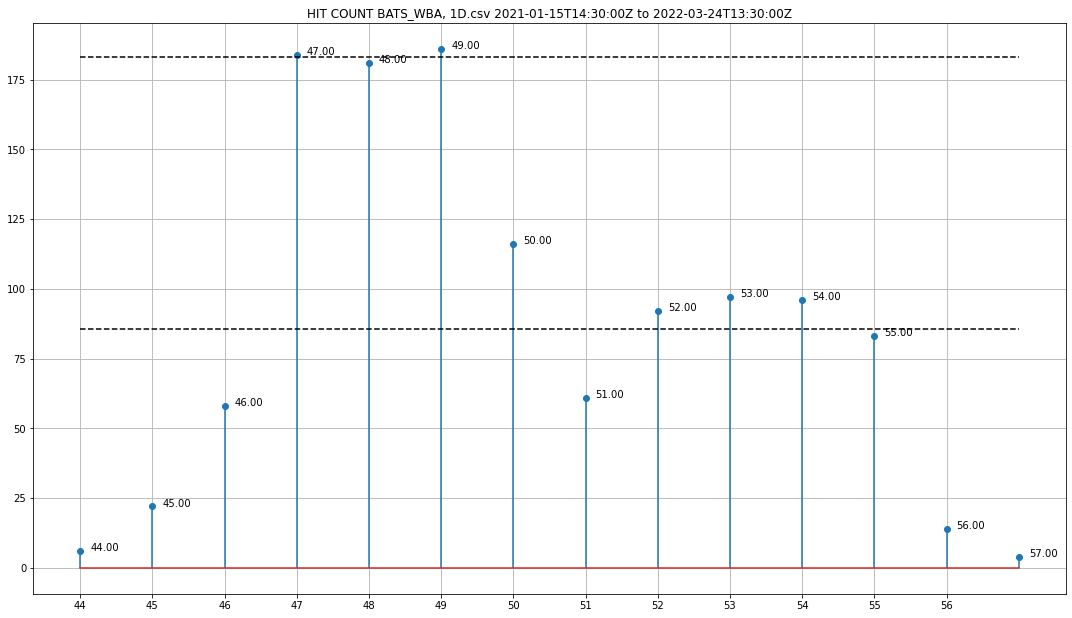

In [82]:
import yfinance as yf
import pandas as pd
import numpy as np
from ta.momentum import StochRSIIndicator
from ta.momentum import RSIIndicator
from ta.volume import ForceIndexIndicator
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
dec=0

csv_name='BATS_WBA, 1D.csv'
payload=pd.read_csv(csv_name)
payload['open']=np.around(payload.open,decimals=dec)
payload['close']=np.around(payload.close,decimals=dec)
payload['high']=np.around(payload.high,decimals=dec)
payload['low']=np.around(payload.low,decimals=dec)
dfc=pd.DataFrame(payload.groupby('close').count().sort_values(by='time',ascending=False).time)
dfo=pd.DataFrame(payload.groupby('open').count().sort_values(by='time',ascending=False).time)
dfh=pd.DataFrame(payload.groupby('high').count().sort_values(by='time',ascending=False).time)
dfl=pd.DataFrame(payload.groupby('low').count().sort_values(by='time',ascending=False).time)
dff=dfc.join(dfo,how='outer',rsuffix='o',sort=True)
dff=dff.join(dfh,how='outer',rsuffix='h',sort=True)
dff=dff.join(dfl,how='outer',rsuffix='l',sort=True).fillna(0)
dff['total']=dff.sum(axis=1)

#filter out levels that are hit least frequent
#dff=dff[dff.total>=np.percentile(dff.total,30)]

#filter out levels that are too close to each other
dff['ind']=dff.index
dff['p']=dff.ind.diff(periods=1).fillna(0)
dff['p1']=dff.total.diff(periods=1).fillna(0)
dff=dff[dff.p>=np.percentile(dff.p,0)]


#dff=dff.sort_values(by='total',ascending=False)
dff.to_csv('avaxeth-lvls.csv')
#print(np.percentile(dff.total,33))
#dfc=pd.DataFrame(payload.groupby('close').count())
#print(payload.head)
print(dff)
avg=(np.median(dff.total))

#print(dff[dff.total>0])
#print(dff[(dff.total>avg*1.5) & (dff.total< avg*3)])
#print(np.average(dff.total))
#print(np.median(dff.total))
#print(np.max(dff.total))
#print(dff[(dff.total>np.percentile(dff.total,15)) & (dff.total< np.percentile(dff.total,30))])



# We can set the number of bins with the *bins* keyword argument.
fig, ax = plt.subplots()
plt.stem(dff.ind,dff.total)
ax.grid()
fig.set_size_inches(18.5, 10.5)
ax.xaxis.set_ticks(np.arange(np.min(dff.ind),np.max(dff.ind),1))
#ax.yaxis.set_ticks(np.arange(0,np.max(dff.total)))

for x,y in zip(dff.ind,dff.total):

    label = "{:.2f}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

ax.plot([np.min(dff.ind),np.max(dff.ind)],[np.mean(dff.total),np.mean(dff.total)],'--k')
ax.plot([np.min(dff.ind),np.max(dff.ind)],[np.percentile(dff.total,90),np.percentile(dff.total,90)],'--k')
title='HIT COUNT '+csv_name+" "+payload.time[0]+" to "+payload.time[len(payload.time)-1]
plt.title(title)
plt.savefig(title+'.png')    
plt.show()